Made this model using synthetic data

In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate synthetic fraud data
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=2,
                           n_clusters_per_class=1, weights=[0.9, 0.1],
                           flip_y=0.01, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Class'] = y  # 0 = Normal, 1 = Fraud

df.to_csv("synthetic_fraud.csv", index=False)
print(df['Class'].value_counts())


Class
0    896
1    104
Name: count, dtype: int64


Class Distribution:
 Class
0    896
1    104
Name: count, dtype: int64

Confusion Matrix:
 [[267   2]
 [  1  30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       269
           1       0.94      0.97      0.95        31

    accuracy                           0.99       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.99      0.99      0.99       300



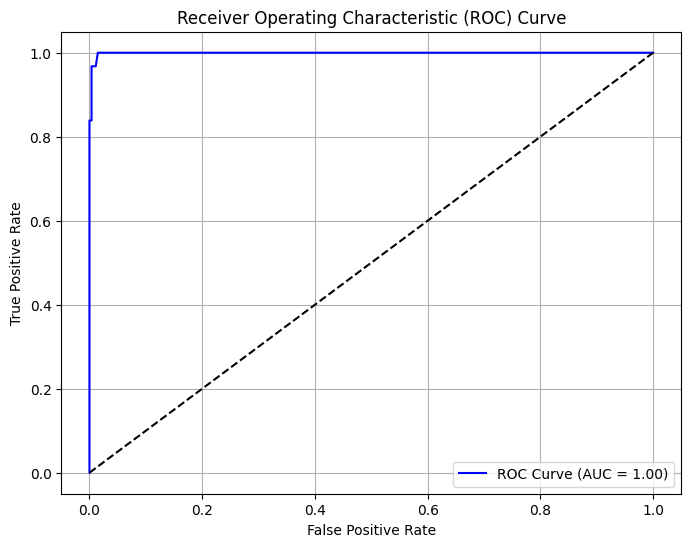

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 2: Generate synthetic fraud data
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=2,
                           n_clusters_per_class=1, weights=[0.9, 0.1],
                           flip_y=0.01, random_state=42)

df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Class'] = y

# Step 3: Check class distribution
print("Class Distribution:\n", df['Class'].value_counts())

# Step 4: Train-test split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Feature scaling (optional but good for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: ROC Curve
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Insights:

Confusion Matrix:

267 true negatives (normal transactions correctly classified as normal)

30 true positives (fraudulent transactions correctly identified as fraud)

1 false negative (a fraud missed)

2 false positives (normal transactions wrongly classified as fraud)

Classification Report:

Precision for fraud (class 1): 94% (Out of all the predicted frauds, 94% were actually fraud)

Recall for fraud: 97% (Out of all the actual frauds, 97% were caught)

F1-score: 95% (harmonic mean of precision and recall for fraud)

Accuracy: 99% (overall correct predictions)


